# **IL VERO AGGIORNATO AL 24 APRILE ORE 16:59**

In [1]:
from IPython.display import Markdown
import datetime

now = datetime.datetime.now()
markdown_str = f"Last update: {now} "

display(Markdown(markdown_str))

Last update: 2023-04-25 01:35:56.597003 

# LAVORARE SU QUESTO!!!!!!!!: è la versione aggiornata di main copia 3 con il training della rete neurale giusta

# Playing around fashionMNSIT

In [2]:
# QUESTO USARE QUESTO
from tqdm import trange

import numpy as np
import matplotlib.pyplot as plt

import torch as th
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms


# Defining transforms 
to_tensor = transforms.ToTensor()
normalization = transforms.Normalize(mean=0.286, std=0.353)

data_transforms = transforms.Compose([to_tensor, normalization])

# load the data
train_dataset = datasets.FashionMNIST(
    root="./data", train=True, transform=data_transforms, download=True, 
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, transform=data_transforms, download=True
)


# sample from train_dataset 1000 images from training and 333 for test
SAMPLE_SIZE = 1000  # for training
TEST_SAMPLE_SIZE = int(0.3*SAMPLE_SIZE)


np.random.seed(0)
train_idxs = np.random.choice(train_dataset.data.shape[0], size=SAMPLE_SIZE, replace=False)
test_idxs =  np.random.choice(test_dataset.data.shape[0], size=TEST_SAMPLE_SIZE, replace=False)

# Split the data into X_train, y_train, X_test and y_test TENSORS
X_train = train_dataset.data[train_idxs].view(SAMPLE_SIZE, 1, 28, 28)
y_train = train_dataset.targets[train_idxs]
X_test = test_dataset.data[test_idxs].view(TEST_SAMPLE_SIZE, 1, 28, 28)
y_test = test_dataset.targets[test_idxs]

X_train = X_train.to(dtype=th.float) # casting X_train to a floating point data type
X_train = (X_train - X_train.mean()) / X_train.std() # normalize
X_test = X_test.to(dtype=th.float) # casting X_test to a floating point data type
X_test = (X_test - X_test.mean()) / X_test.std() # normalize


# Define the DataLoader to be used during Neural Network training

# Define the batch_size to perform stochastic gradient descent
BATCH_SIZE = 10
train_loader = DataLoader(dataset=list(zip(X_train, y_train)), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=list(zip(X_test, y_test)), batch_size=BATCH_SIZE, shuffle=True)

# Define training and test set to be used with numpy

# Reshape and normalize training set to numpy
X_train_p = X_train.reshape(SAMPLE_SIZE, 28, 28)
X_train_np = th.Tensor.numpy(X_train_p).reshape(SAMPLE_SIZE, 28*28) # X_train_np is the training set "translated" in numpy
X_train_np = (X_train_np - X_train_np.mean())/X_train_np.std()
y_train_np = th.Tensor.numpy(y_train).reshape(SAMPLE_SIZE)

# Reshape and normalize test set to numpy
X_test_p = X_test.reshape(TEST_SAMPLE_SIZE, 28, 28)
X_test_np = th.Tensor.numpy(X_test_p).reshape(TEST_SAMPLE_SIZE, 28*28) # X_train_np is the training set "translated" in numpy
X_test_np = (X_test_np - X_test_np.mean())/X_test_np.std()
y_test_np = th.Tensor.numpy(y_test).reshape(TEST_SAMPLE_SIZE)


## Loading the data using torchvision

The following code is to compute the mean and the standard deviation of the dataset, to be used inside `transfroms.Normalization` function. \
We get the following value:
 - mean = 0.286
 - sd = 0.353

In [3]:
"""
to_tensor = transforms.ToTensor()
data_transforms = transforms.Compose([to_tensor])

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, transform=data_transforms, download=True
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, transform=data_transforms, download=True
)

X_train = th.Tensor.numpy(train_dataset.data)
y_train = th.Tensor.numpy(train_dataset.targets.data)

print(X_train.mean()/X_train.max())
print(X_train.std()/X_train.max())
mean = X_train.sum()/X_train.max()
sd = X_train.std()/X_train.max()
"""

'\nto_tensor = transforms.ToTensor()\ndata_transforms = transforms.Compose([to_tensor])\n\ntrain_dataset = datasets.FashionMNIST(\n    root="./data", train=True, transform=data_transforms, download=True\n)\ntest_dataset = datasets.FashionMNIST(\n    root="./data", train=False, transform=data_transforms, download=True\n)\n\nX_train = th.Tensor.numpy(train_dataset.data)\ny_train = th.Tensor.numpy(train_dataset.targets.data)\n\nprint(X_train.mean()/X_train.max())\nprint(X_train.std()/X_train.max())\nmean = X_train.sum()/X_train.max()\nsd = X_train.std()/X_train.max()\n'

Load data using mean and std computed before

**Remark:** 
- every time i call `train_loader`, a batch of `BATCH_SIZE = 10` images with their labels is extracted form the `SAMPLE_SIZE = 1000` examples belonging to the *mini-training dataset* `X_train, y_train`.
- every time i call `test_loader`, a batch of `BATCH_SIZE = 10` images with their labels is extracted form the `TEST_SAMPLE_SIZE = 330` examples belonging to the *mini-test dataset* `X_test, y_test`.

Plot some images from the dataset.

In [5]:
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']


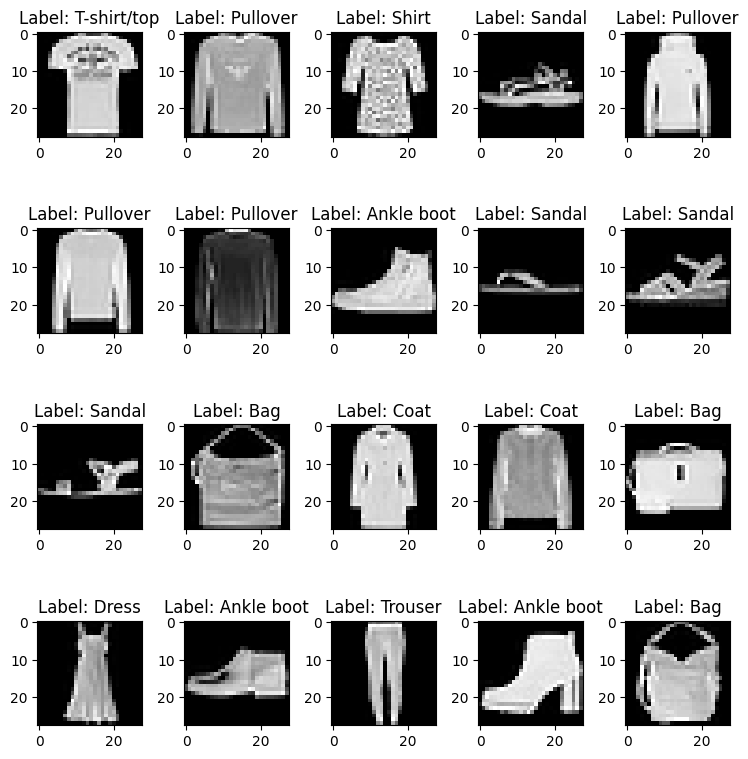

In [50]:
# plot using X_train_p (cause i want shape 28x28, NOT 784)
n_row = 4
n_col = 5

n=n_row * n_col
images=X_train_p[:n]
labels=y_train_np[:n]

fig, axes=plt.subplots(n_row, n_col, figsize=(1.5*n_col, 2*n_row))
for i in range(n):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {classes_names[labels[i]]}")
plt.tight_layout()
plt.show()

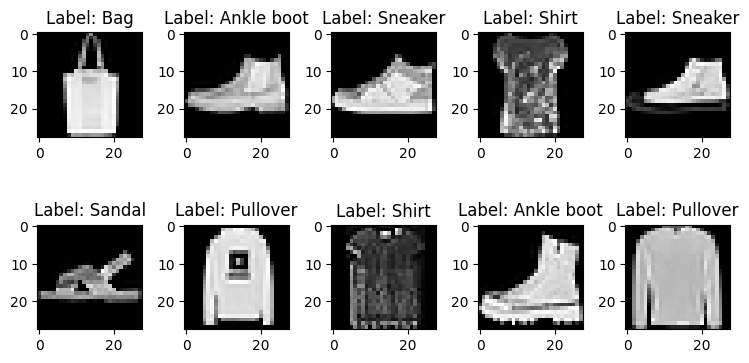

In [107]:
# plot using training_loader
dataiter = train_loader.__iter__()
images, labels = dataiter.__next__()

fig, axes=plt.subplots(2, 5, figsize=(1.5*n_col, 2*n_row))
for i in range(BATCH_SIZE):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(images[i].view(28,28), cmap='gray')
    ax.set_title(f"Label: {classes_names[labels[i]]}")
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


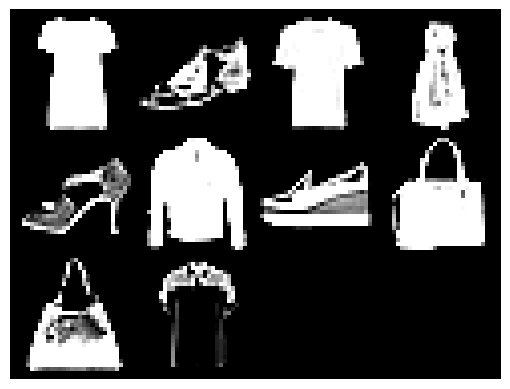

In [74]:
dataiter = train_loader.__iter__()
images, labels = dataiter.__next__()

def imshow(img):
    npimg = img.numpy()
    plt.axis("off")
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# [:40,:] to show 40 imgs
imshow(torchvision.utils.make_grid(images, nrow=4))

Load the:
- training data features inside `X_train` and the training data labels inside `y_train`
- test data features inside `X_test` and the test data labels inside `y_test`

Feature batch shape: torch.Size([1000, 1, 28, 28])
Labels batch shape: torch.Size([1000])


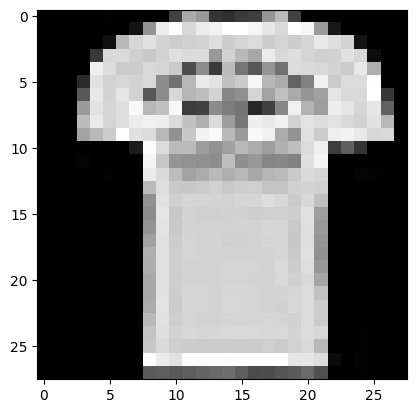

Label: T-shirt/top


In [75]:
print(f"Feature batch shape: {X_train.size()}")
print(f"Labels batch shape: {y_train.size()}")
img = X_train[0].squeeze()
label = y_train[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {classes_names[label]}")

To remove the channel size, which we don't care outside neural network training, reshape `X_train` tensor (1000x1x28x28) to `X_train_p` tensor (1000x28x28); then we export `X_train_p` (1000x28x28) and `y_train` (1000) tensors into `X_train_np` (1000x28x28) and `y_train_np` (1000) numpy array, to use them with `sklearn`. \
Finally we reshape `X_train_np` to size (1000x784) to work with `sklearn`. 

Summarizing:
 - `X_train`, `y_train` are `tensor` objects and used in NN training 
 - `X_train_np`, `y_train_np` are `numpy.arrays` and used in `sklearn` modules.

In [7]:
# just check that data now are normalized
print(np.mean(X_train_np), np.std(X_train_np))
print(y_train.shape)
print(y_train[:10])


2.9116261e-08 0.9999999
torch.Size([1000])
tensor([0, 2, 6, 5, 2, 2, 2, 9, 5, 5])


## 1 - Understanding data geometry

### Linear PCA

Linear PCA on 2 and 3 principal components

In [81]:
from sklearn.decomposition import PCA
# perform PCA with 2 components
pca = PCA()
X_new = pca.fit_transform(X_train_np)
print(X_new.shape)

(1000, 784)


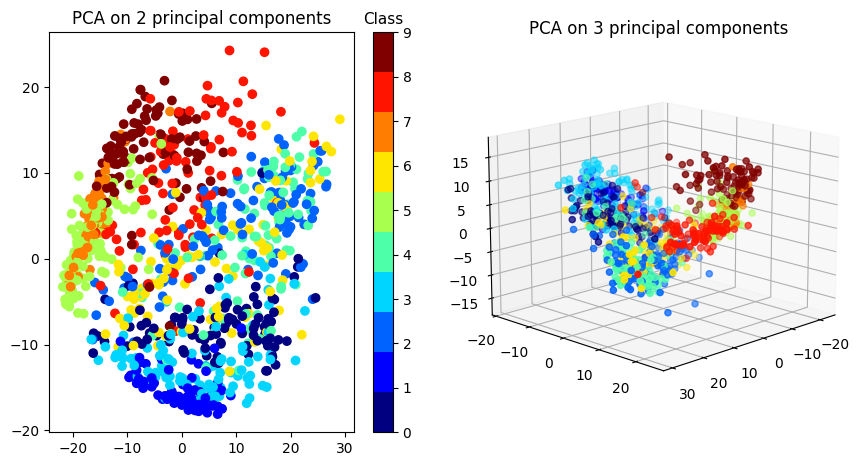

In [92]:
import matplotlib.pyplot as plt

# Create the first subplot (2D plot)
fig = plt.figure(figsize=(10,5))
cmap = plt.get_cmap('jet', 10) #
ax1 = fig.add_subplot(121)
p=ax1.scatter(X_new[:,0], X_new[:,1], c=y_train_np, cmap=cmap)
ax1.set_title('PCA on 2 principal components')

# Create the second subplot (3D plot)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(X_new[:,0], X_new[:,1], X_new[:,2], c=y_train_np, cmap=cmap)
ax2.view_init(15, 45)
ax2.set_title('PCA on 3 principal components')

# Adjust the layout and padding of the subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1)

# Show the plots
cb = plt.colorbar(p) #
cb.ax.set_title('Class', fontsize=11) #
plt.show()


How images "appears" after PCA

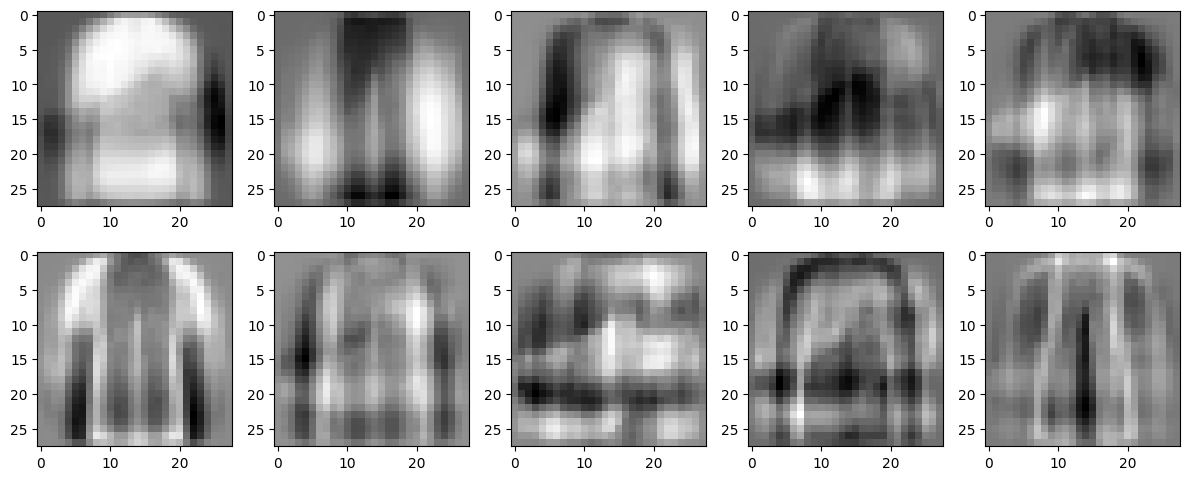

In [83]:
pc_10 = [pca.components_[i].reshape(28,28) for i in range(0,10)]
fig, axes=plt.subplots(n_row, n_col, figsize=(12, 5))
for i in range(10):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(pc_10[i], cmap='gray')
plt.tight_layout()
plt.show()

### Kernel Gaussian PCA

Gaussian kernel PCA on 2 and 3 components with default `gamma = 1/n_features`

In [78]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components = 3, kernel = 'rbf')
X_new = kernel_pca.fit_transform(X_train_np)
print(X_new.shape)


(1000, 3)


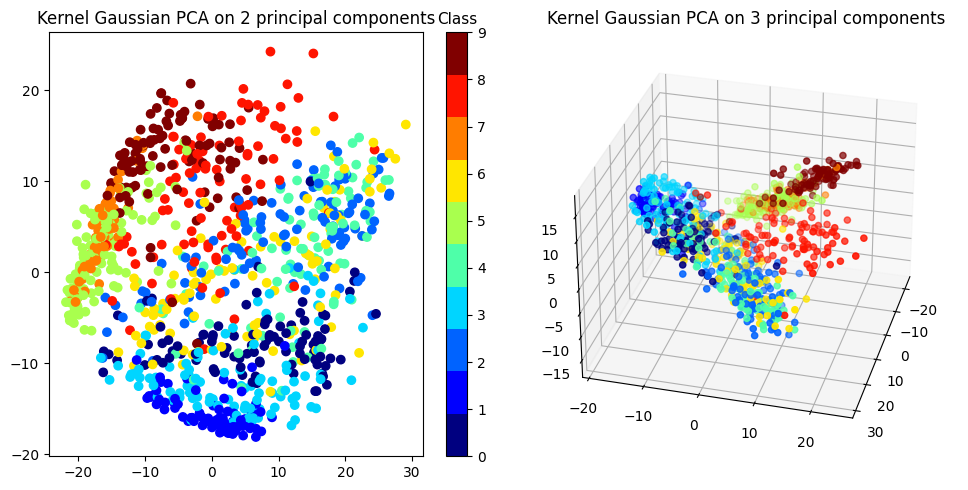

In [98]:
import matplotlib.pyplot as plt

# Create the first subplot (2D plot)
fig = plt.figure(figsize=(10,5))
camp = plt.get_cmap('jet', 10) #
ax1 = fig.add_subplot(121)
p=ax1.scatter(X_new[:,0], X_new[:,1], c=y_train_np, cmap=cmap)
ax1.set_title('Kernel Gaussian PCA on 2 principal components')

# Create the second subplot (3D plot)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(X_new[:,0], X_new[:,1], X_new[:,2], c=y_train_np, cmap=cmap)
ax2.view_init(30,15)
ax2.set_title('Kernel Gaussian PCA on 3 principal components')

# Adjust the layout and padding of the subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1)

# Show the plots
cb = plt.colorbar(p) #
cb.ax.set_title('Class', fontsize=11) #

plt.tight_layout()
plt.show()


Tune the dispersion parameter gamma:
- plot the 3-dim projection of the data using `gamma` from `param_grid`
- choose the `gamma` fo
r which the projection is best explainaied geometrically

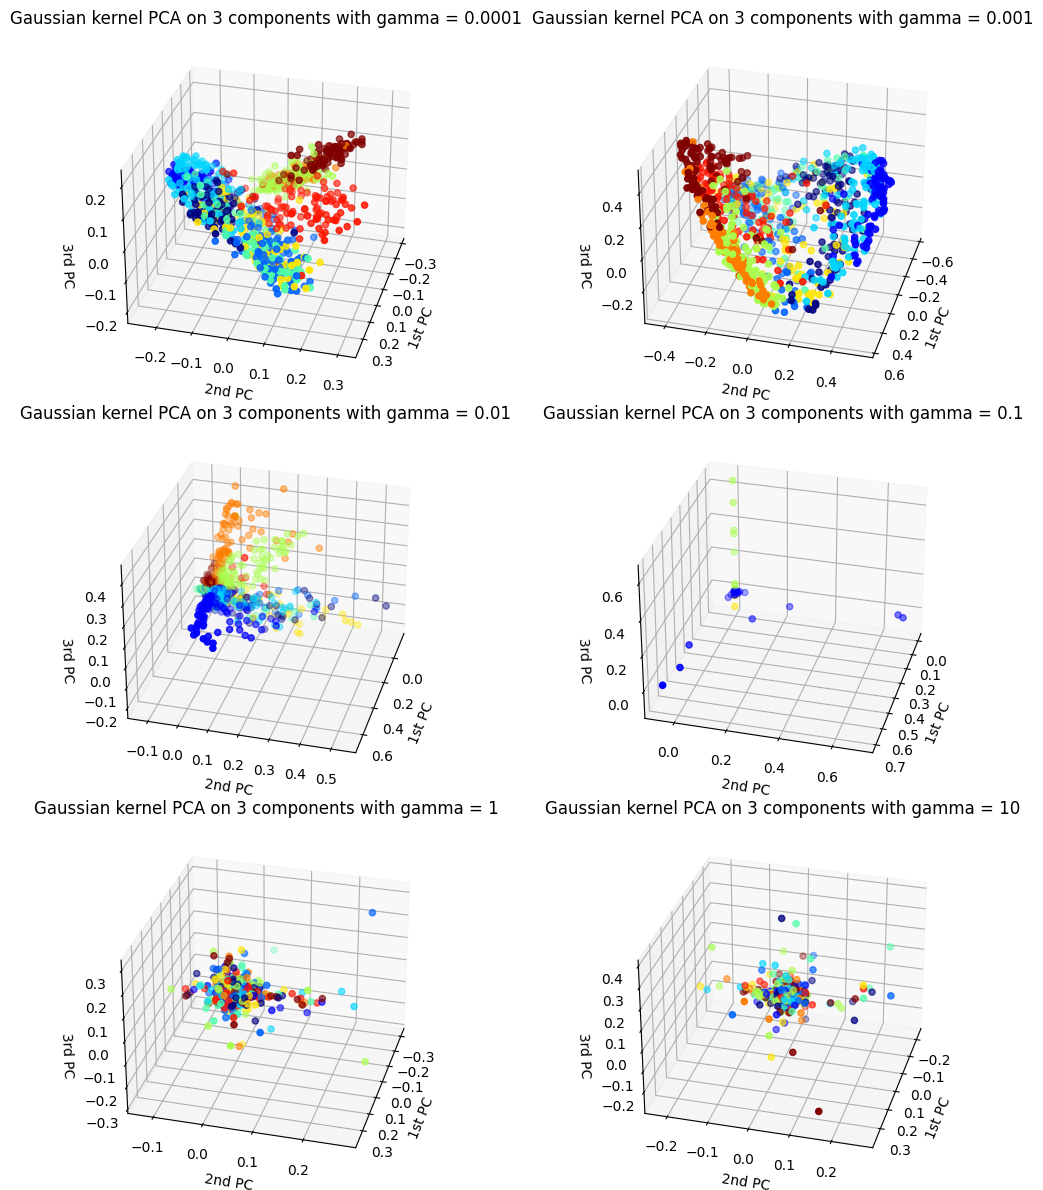

In [100]:
param_grid = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), subplot_kw={'projection': '3d'})
camp = plt.get_cmap('jet', 10) #
axes = axes.flatten()

for i in range(len(param_grid)):
    kernel_pca = KernelPCA(n_components=3, kernel='rbf', gamma=param_grid[i])
    X_new = kernel_pca.fit_transform(X_train_np)

    ax = axes[i]
    ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y_train_np, cmap = cmap)
    ax.view_init(30, 15)
    ax.set_title(f'Gaussian kernel PCA on 3 components with gamma = {param_grid[i]}')
    ax.set_xlabel('1st PC')
    ax.set_ylabel('2nd PC')
    ax.set_zlabel('3rd PC')

fig.tight_layout()
plt.show()


Clearly, with `gamma` greater than $0.1$, the projection is not so good. Conversly, with `gamma` close to $0$ the projection allows to understand pretty well the underlying geometry of the data: we can clearly see a separation between "brighter" and "darker" labels.

### Kernel Polynomial PCA

Perform polynomial kernel PCA on 3 principal components:
- plot the 3-dim projection of the data using `degree` from `param_grid`
- choose the `degree` for which the projection is best explainaied geometrically

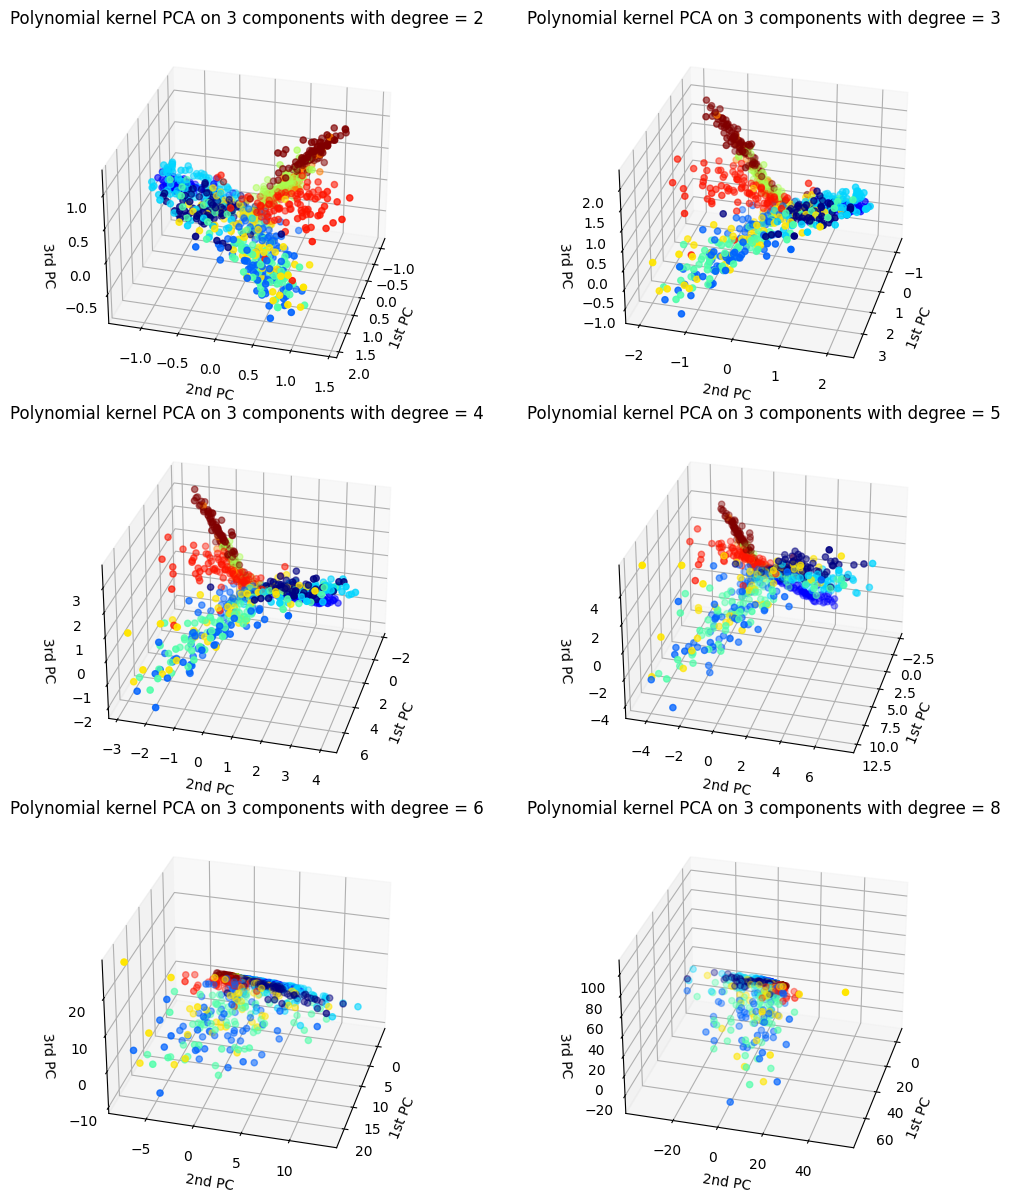

In [102]:
param_grid = [2,3,4,5,6,8]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), subplot_kw={'projection': '3d'})
camp = plt.get_cmap('jet', 10) #
axes = axes.flatten()

for i in range(len(param_grid)):
    kernel_pca = KernelPCA(n_components=3, kernel= 'poly' , degree = param_grid[i])
    X_new = kernel_pca.fit_transform(X_train_np)

    ax = axes[i]
    ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y_train_np, cmap=cmap)
    ax.view_init(30, 15)
    ax.set_title(f'Polynomial kernel PCA on 3 components with degree = {param_grid[i]}')
    ax.set_xlabel('1st PC')
    ax.set_ylabel('2nd PC')
    ax.set_zlabel('3rd PC')

fig.tight_layout()
plt.show()

Looking at the grid-scale, we can see that increase the degree corresponds to "strech" the data and understanding the geometry become more difficult. \
Focusing on low degree (up to $5$), we can see a pretty good separation, but still we have some problem: for example green-scale and light-blue-scale points are spread around.

### Isomap and t-SNE

Let's try another two algorithm that might be suitable for the dimensionality reduction purpose

#### Isomap

In [84]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=3, path_method='FW')
X_isomap = isomap.fit_transform(X_train_np)

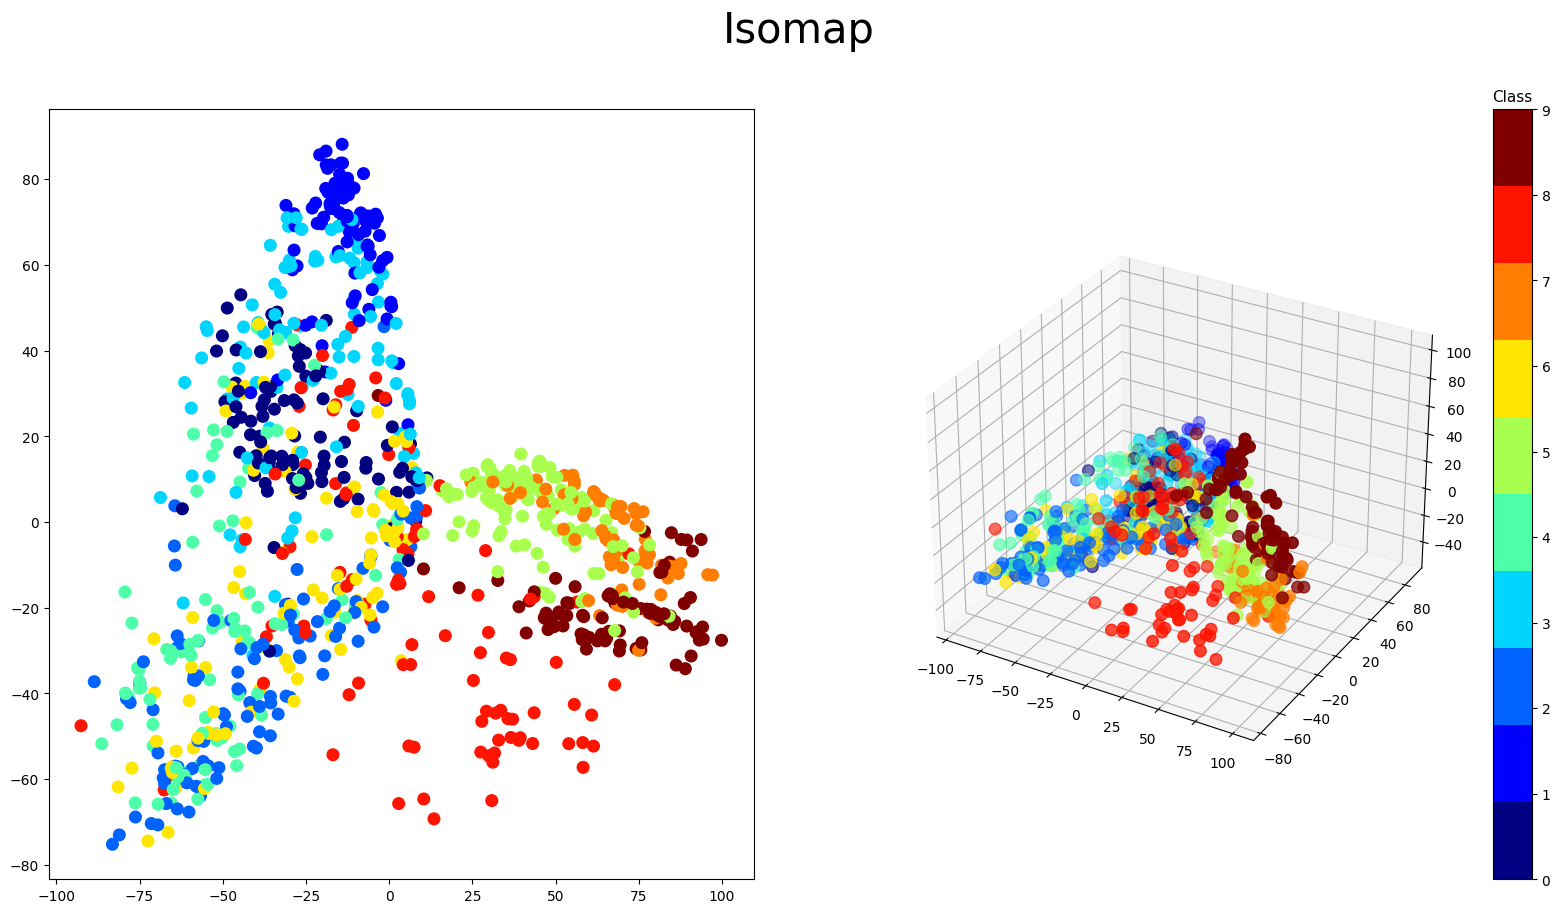

In [86]:
fig = plt.figure(figsize=(20,10))
cmap = plt.get_cmap('jet', 10)
fig.suptitle("Isomap", fontsize=30)
ax = fig.add_subplot(1,2,1)
ax.scatter(X_isomap[:,0], X_isomap[:,1], c=y_train_np, s=70, cmap = cmap)

ax = fig.add_subplot(1,2,2, projection='3d')
p = ax.scatter3D(X_isomap[:,0], X_isomap[:,1], X_isomap[:,2], c=y_train_np, s=70, cmap= cmap)

cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.show()

#### t-SNE

In [87]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_train_np)

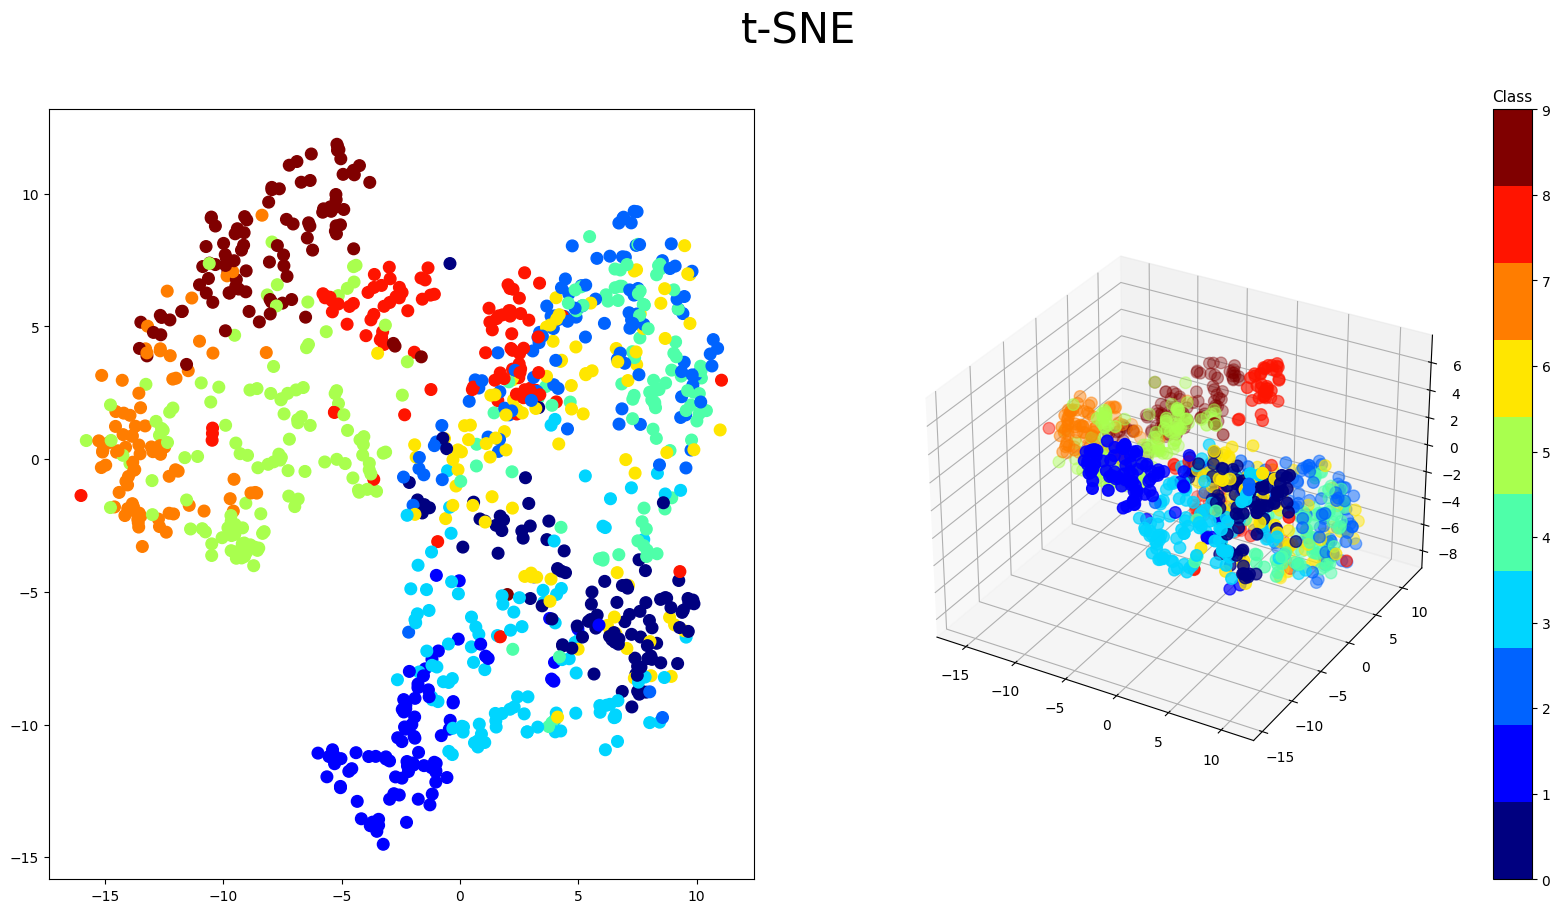

In [88]:
fig = plt.figure(figsize=(20,10))
cmap = plt.get_cmap('jet', 10)
fig.suptitle("t-SNE", fontsize=30)
ax = fig.add_subplot(1,2,1)
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train_np, s=70, cmap= cmap)

ax = fig.add_subplot(1,2,2, projection='3d')
p = ax.scatter3D(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=y_train_np, s=70, cmap= cmap)

cb = plt.colorbar(p)
cb.ax.set_title('Class', fontsize=11)
plt.show()

## 2 - Clustering on 10-dimension Kernel PCA projection

- Choose a dimensionality reduction method which best separates the geometry of the data.
- Project the data on the first 10 components.
- Assign labels to the data ("unsupervised-mode assignation") according to `kemans`
- Three labels objects at the end of this section:
    - `y_train_np`: contain the true training labels
    - `y_pred`: contain the predicted labels by `kmeans`, but cluster $i$ is not guaranteed to match with class $i$
    - `mapped_labels`: contain the predicted labels by `kmeans`, reordered so that cluster $i$ match the class for which it has the majority of datapoints

- From previous analysis, gaussian kernel is better than polynomial. 
- By visualizing the projecetion, the best `gamma` are $0.0001$ and $0.001$. We choose the gaussian kernel with `gamma` = $0.0001$ beacuse it achieves the best `homogenity_score` and `completeness_score` (see below). 
- With this kernel PCA, we project the data onto the 10 principal components

In [122]:
from sklearn.decomposition import KernelPCA
# project on first 10 components
kernel_pca = KernelPCA(n_components=10, kernel= 'rbf' , gamma = 0.0001, eigen_solver= 'randomized', fit_inverse_transform=True) 
X_new = kernel_pca.fit_transform(X_train_np)

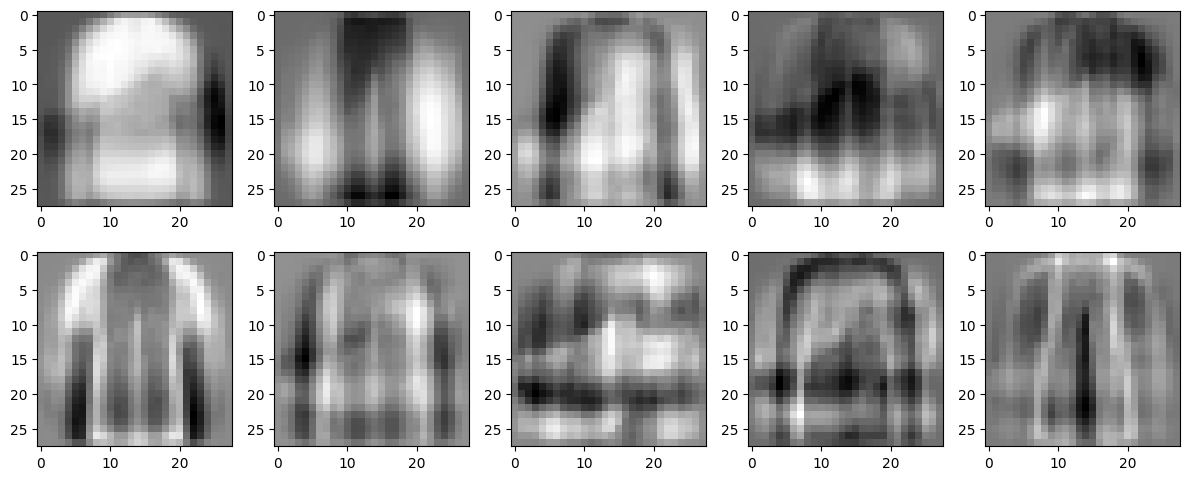

In [124]:
kpca_10 = [kernel_pca.X_transformed_fit_[i] for i in range(0,10)]
fig, axes=plt.subplots(n_row, n_col, figsize=(12, 5))
for i in range(10):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(pc_10[i], cmap='gray')
plt.tight_layout()
plt.show()

To assign 10 labels to the projected data, rely on `kmeans` algorithm.

In [125]:
# clustering on X_new
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_new)

y_pred = kmeans.labels_

# NB: kmeans.predict(X_new) == kmeans.labels_

To assess the projection and the clustering, the idea is to compare the label assigned from the `kmeans` algorithm to each data point with the true label stored inside `y_train`. \
Issue: there's no guarantee that the label assigned by `kmeans` algorithm match the true labels. Even if we are so lucky that the projection and `kmeans` algorithm perfects classify the data, it can happen that the $i$-th true label is mapped into the $j$-th cluster build by `kmeans` algorithm (in other words we can have a permutation of the classes). \
To assess the performances we use the `homogenity_score` and the `completeness_score`, which takes this into account. \
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score

In [126]:
from sklearn.metrics import homogeneity_score, completeness_score

print('homogenity score: ', homogeneity_score(y_train_np, kmeans.labels_))
print('completeness_score: ', completeness_score(y_train_np, kmeans.labels_))

homogenity score:  0.48265462718465885
completeness_score:  0.48521730618758635


- With the following code is possible to match the clusters with the actual classes: for each cluster it is spotted the most frequent true label, and that label is then assigned to that cluster.
- `mapped_labels` contains the labels reordered to match with the true labels in `y_train_np`.
- There's still a problem concerning the performance of `kmeans`: it might happen that a true label, say $i$, is never the most frequent in each of the $10$ clusters. If this happen (and with a small batch this is pretty likely to happen), the `mapped_labels` will not contain any $i$ label, meaning that we "lose" class $i$.


In [127]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

mapped_labels = np.zeros_like(y_pred)
for i in range(10):
    mask=(y_pred==i)
    mapped_labels[mask] = mode(y_train_np[mask])[0]

/var/folders/m2/r059lv3n7nq9x6gh78v25xk80000gn/T/ipykernel_15061/1285088800.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mapped_labels[mask] = mode(y_train_np[mask])[0]


The following line just to show that `homogeneity_score` and `completeness_score` don't change since they are mapping-label-independent

In [128]:
print('homogenity score: ', homogeneity_score(y_train_np, kmeans.labels_))
print('completeness_score: ', completeness_score(y_train_np, kmeans.labels_))

homogenity score:  0.48265462718465885
completeness_score:  0.48521730618758635


Build a confusion matrix with *before* the correct mapping: note that high value, expected to be on diagonal, are permutated.

Build a confusion matrix *after* the reordering of the labels: as expected, the higher value are almost all on the diagonal

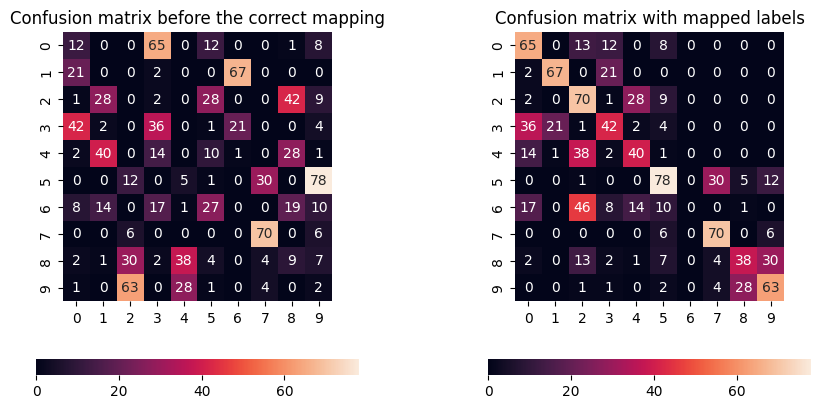

In [129]:
import seaborn as sns

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

sns.heatmap(confusion_matrix(y_train_np, kmeans.predict(X_new)), square=True, annot=True, fmt='g', ax=ax1, cbar_kws={"orientation": "horizontal"})

sns.heatmap(confusion_matrix(y_train_np, mapped_labels), square=True, annot=True, fmt='g', ax=ax2, cbar_kws={"orientation": "horizontal"})

# Set the titles and axis labels for each subplot
ax1.set_title('Confusion matrix before the correct mapping')

ax2.set_title('Confusion matrix with mapped labels')


# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()


In [ ]:
kernel_pca_complete = KernelPCA(n_components=X_train_np.shape[1], kernel= 'rbf' , gamma = 0.0001, eigen_solver= 'randomized')
kernel_pca_complete.fit(X_train_np)

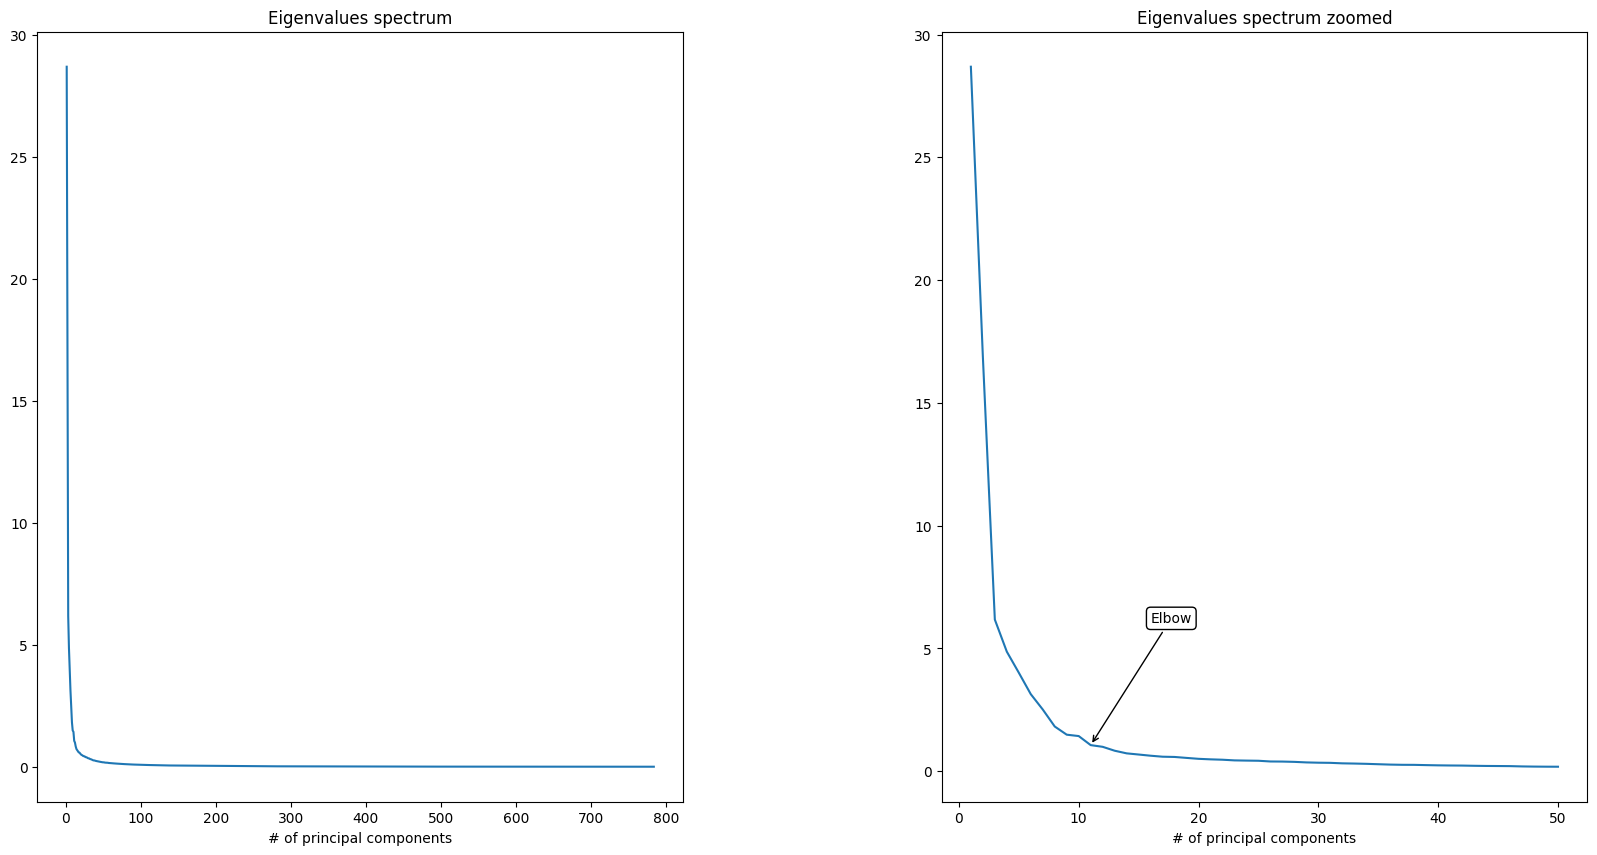

In [ ]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Plot the data on the subplots
ax1.plot(np.arange(1,785),kernel_pca_complete.eigenvalues_)
ax2.plot(np.arange(1,51),kernel_pca_complete.eigenvalues_[:50])

# Set the titles and axis labels for each subplot
ax1.set_title('Eigenvalues spectrum')
ax1.set_xlabel('# of principal components')
ax2.set_title('Eigenvalues spectrum zoomed')
ax2.set_xlabel('# of principal components')

el = 10
el_x = 10+1
el_y = kernel_pca_complete.eigenvalues_[el]
ax2.annotate('Elbow', xy = (el_x, el_y), 
             xytext=(el_x +5, el_y + 5),
             arrowprops = dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle='round', pad=0.3,facecolor='white', edgecolor='black'))

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()


Let's see the kind of object we end up with inside each cluster, using:
- true labels
- mapped_labels
- unordered labels

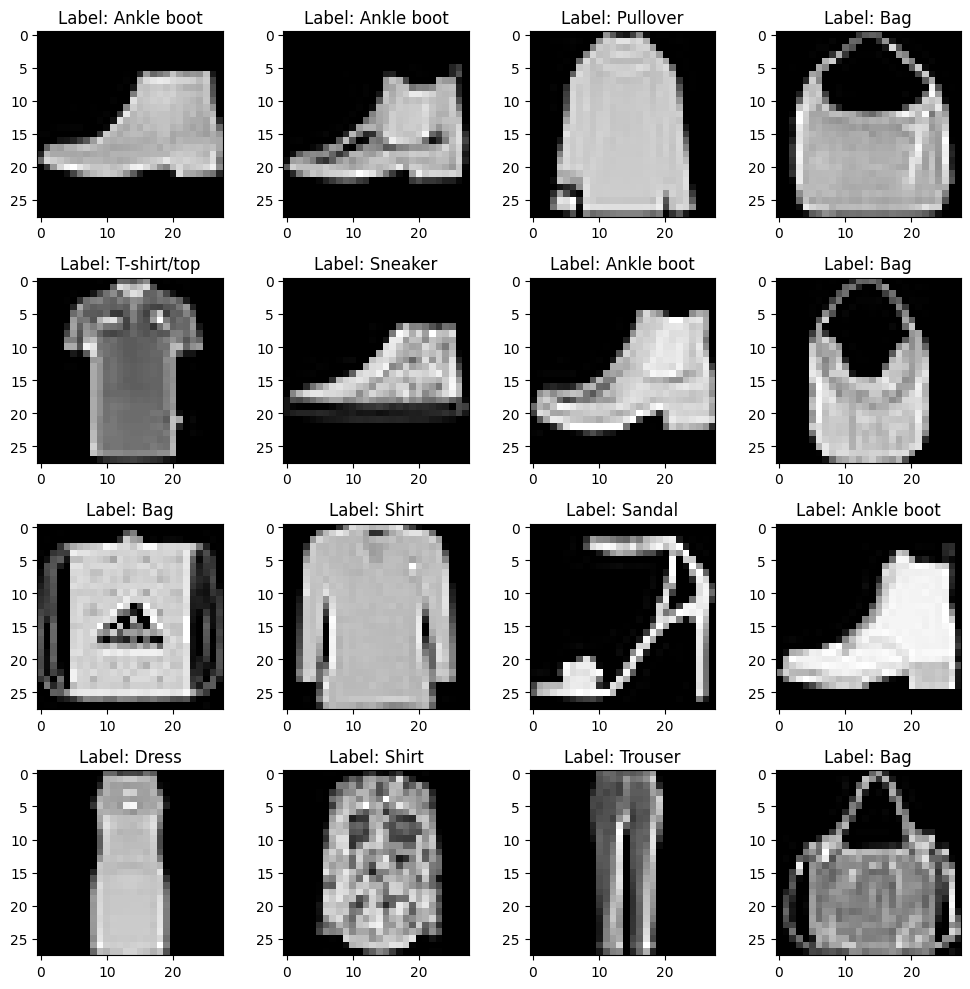

In [130]:
""" y_train: true labels"""
np.random.seed(1)
idxs = np.random.choice(X_train_np.shape[0], 16, False)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = X_train[idxs[i]].squeeze()
    label = y_train[idxs[i]]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {classes_names[label]}")
    
plt.tight_layout()
plt.show()


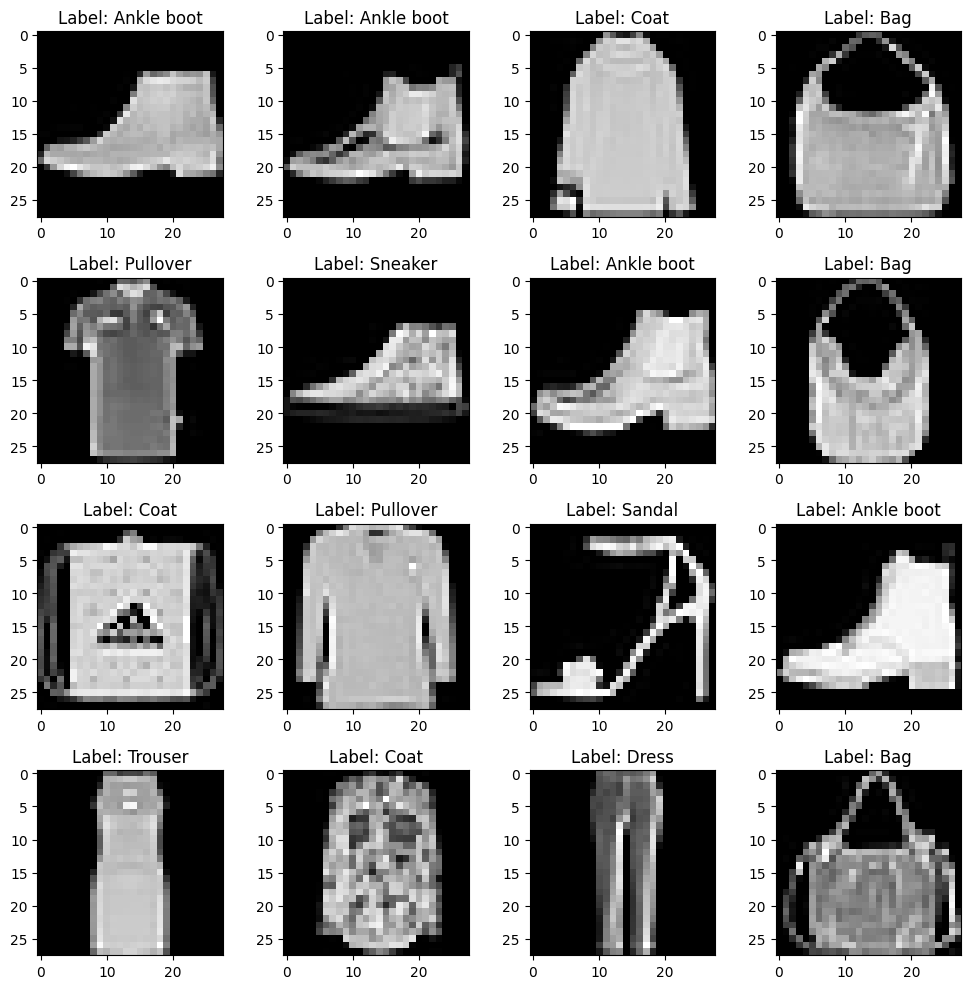

In [131]:
""" mapped_labeles: reordered labels"""
np.random.seed(1)
idxs = np.random.choice(X_train_np.shape[0], 16, False)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = X_train[idxs[i]].squeeze()
    label = mapped_labels[idxs[i]]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {classes_names[label]}")
    
plt.tight_layout()
plt.show()


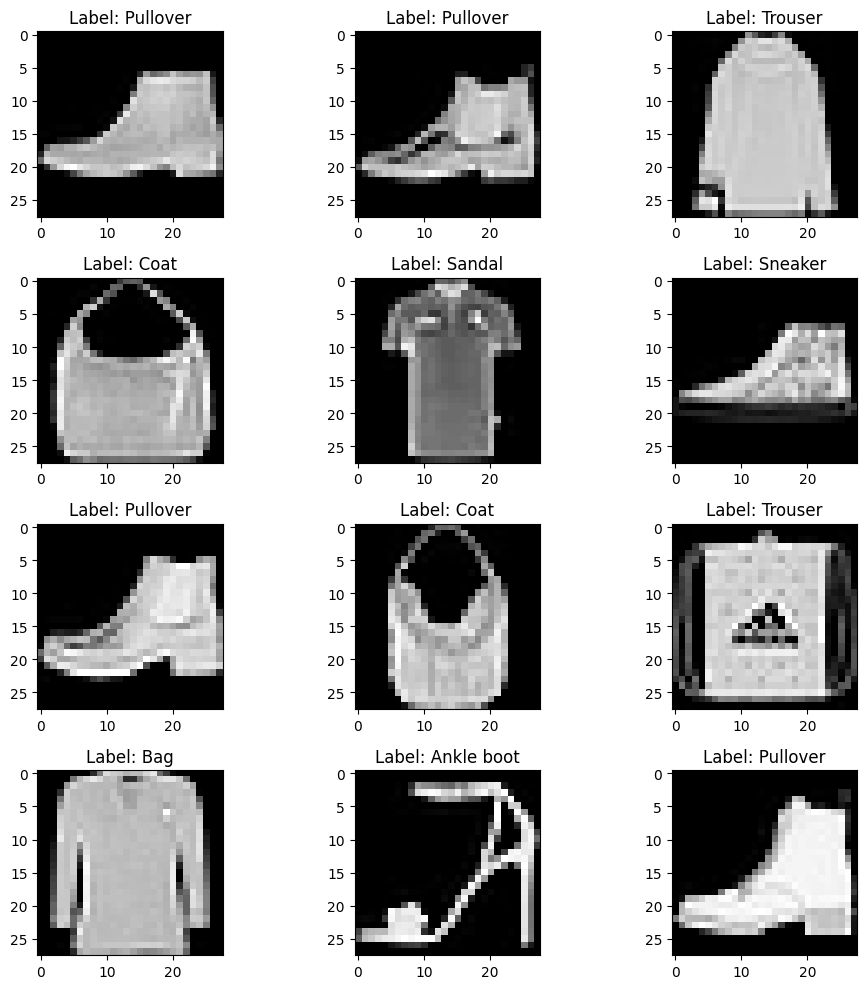

In [132]:
""" y_pred: unordered labels"""
np.random.seed(1)
idxs = np.random.choice(X_train_np.shape[0], 12, False)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = X_train[idxs[i]].squeeze()
    label = y_pred[idxs[i]]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {classes_names[label]}")
    
plt.tight_layout()
plt.show()

Analysis of the spectrum of the Gaussian Kernel PCA with `gamma` $=0.0001$, to see wether the number of components used before ($10$) is coherent with the elbow in the associated spectrum plot.

In [23]:
kernel_pca_complete = KernelPCA(n_components=X_train_np.shape[1], kernel= 'rbf' , gamma = 0.0001, eigen_solver= 'randomized')
kernel_pca_complete.fit(X_train_np)

KernelPCA(eigen_solver='randomized', gamma=0.0001, kernel='rbf',
          n_components=784)

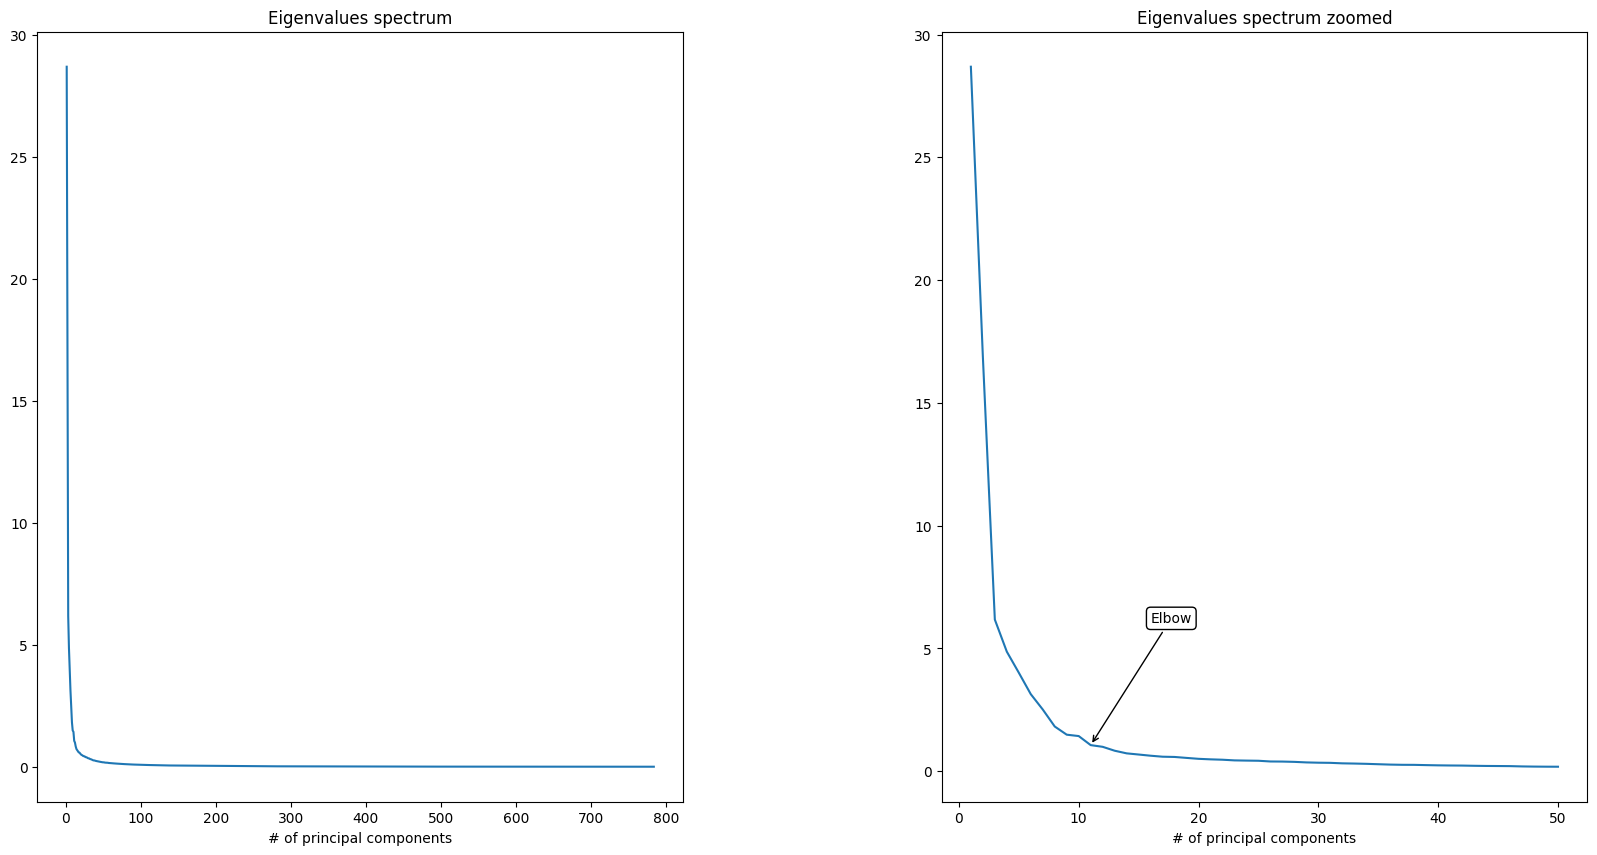

In [24]:
# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Plot the data on the subplots
ax1.plot(np.arange(1,785),kernel_pca_complete.eigenvalues_)
ax2.plot(np.arange(1,51),kernel_pca_complete.eigenvalues_[:50])

# Set the titles and axis labels for each subplot
ax1.set_title('Eigenvalues spectrum')
ax1.set_xlabel('# of principal components')
ax2.set_title('Eigenvalues spectrum zoomed')
ax2.set_xlabel('# of principal components')

el = 10
el_x = 10+1
el_y = kernel_pca_complete.eigenvalues_[el]
ax2.annotate('Elbow', xy = (el_x, el_y), 
             xytext=(el_x +5, el_y + 5),
             arrowprops = dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle='round', pad=0.3,facecolor='white', edgecolor='black'))

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()


Analysis of only the first $50$ components to zoom-in and check if $10$ is coherent.

Actually around $10$ it can be spotted an elbow, meaning that the choice of $10$ principal components is coherent with the PCA eigenvalues spectrum.

## 3 - Supervised classification

The following cell is meant to recover from previous section:
-  `mapped_labels`: reordered labels from `kmeans` of type `np.array`
-  `y_pred`: unordered labels from `kmeans` of type `np.array`

In [25]:
"""The following code is to recover mapped_labels and y_pred, to run directly section 3.
"""
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

kernel_pca = KernelPCA(n_components=10, kernel= 'rbf' , gamma = 0.0001, eigen_solver= 'randomized') 
X_new = kernel_pca.fit_transform(X_train_np)

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_new)
y_pred = kmeans.labels_

from scipy.stats import mode


mapped_labels = np.zeros_like(y_pred)
for i in range(10):
    mask=(y_pred==i)
    mapped_labels[mask] = mode(y_train_np[mask])[0]

/var/folders/m2/r059lv3n7nq9x6gh78v25xk80000gn/T/ipykernel_15061/4174206932.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mapped_labels[mask] = mode(y_train_np[mask])[0]


### Learn a SVM classifier 
Learn a gaussian kernel SVM using the label assigned in the previous step by `kmeans` algorithm. \
It is used `GridSearch` to tune the hyperparameters, and `balanced_accuracy` score to assess the classifier. \
The SVM is learned using both the ordered and the unordered set of training labels, to copare the results. \
Requirements to run:
-  `X_train`: features of type `np.array`
-  `mapped_labels`: reordered labels from `kmeans` of type `np.array`
-  `y_pred`: unordered labels from `kmeans` of type `np.array`

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {'kernel': ['rbf'],'C': np.logspace(-2, 5, 8), 'gamma' : np.logspace(-4, 3, 8)}
SVM_grid = GridSearchCV(SVC(), scoring = 'balanced_accuracy', param_grid = param_grid, cv = StratifiedKFold(n_splits = 3), n_jobs=4)
SVM_grid = SVM_grid.fit(X_train_np, mapped_labels)

# print best parameter
SVM_grid.best_estimator_

SVC(C=100.0, gamma=0.001)

Train the model with the best parameters.
- Training feature: `X_train_np` 
- Training targets: `mapped_labels` 

In [27]:
SVM = SVC(C=100, gamma=0.001) #selected as the best one from above
SVM = SVM.fit(X_train_np, mapped_labels)

**Part of section 4** Now use the test features `X_test` and the test targets `y_test` to see the accuracy of the trained model `SVM`. \
*Remark*: Inside `predicted` there are the predicted labels by the model on the test set `X_test`. Then those prediction are compared with the true test label `y_test`, to see the accuracy.

In [28]:
# now use the trained SVM model on test set, after a little preprocess (reshaping) of X_test (X_test is a tensor but ok... it works)
predicted = SVM.predict(X_test_np)

# accuracy fa schifo, ma perchè le classi sono cmq permutate...
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)
metrics.balanced_accuracy_score(y_test, predicted)

0.48


0.5003352656619444

Just to show what happen if train the model with the unordered "messy" labels, coming from `y_pred`.
- Training feature: `X_train_np` 
- Training targets: `y_pred` 

In [29]:
SVM_fake = SVC(C=10, gamma=0.001) #selected as the best one from above
SVM_fake = SVM_fake.fit(X_train_np, y_pred)

predicted_label = SVM_fake.predict(X_test_np)

accuracy_messy =metrics.accuracy_score(y_test, predicted_label)
print(accuracy_messy)

0.14333333333333334


Just to show what happen if train the model with the true labels, coming from `y_train_np`.
- Training feature: `X_train_np` 
- Training targets: `y_train_np` 

In [30]:
SVM_true = SVC(C=10, gamma=0.001) #selected as the best one from above
SVM_true = SVM_fake.fit(X_train_np, y_train_np)

predicted_label = SVM_fake.predict(X_test_np)

accuracy_true =metrics.accuracy_score(y_test, predicted_label)
print(accuracy_true)

0.7866666666666666


In [133]:
from IPython.display import Markdown

markdown_str = f"As expected, accuracy is much more low now: only ${accuracy_messy*100} \%$ against ${accuracy*100} \%$ we had we the 'correct' labels mapping. With the true labels, we have ${accuracy_true*100} \%$ "

display(Markdown(markdown_str))

As expected, accuracy is much more low now: only $14.333333333333334 \%$ against $48.0 \%$ we had we the 'correct' labels mapping. With the true labels, we have $78.66666666666666 \%$ 

### Learn a fully-connected NN

Learn a fully connected NN using the labels assigned in the previous step by `kmeans` algorithm. \
The network is trained using both the ordered and the unordered set of training labels, to compare the results. \
Requirements to run:
-  `X_train`: features of type `torch.Tensor`
-  `mapped_labels`: reordered labels from `kmeans` of type `np.array`
-  `y_pred`: unordered labels from `kmeans` of type `np.array`
- `X_train_neural`, to perform SDG

Transform `y_pred` and `mapped_labels` into `torch.Tensor` objects

In [32]:
y_pred_tensor = th.from_numpy(y_pred)
mapped_labels_tensor = th.from_numpy(mapped_labels)

#### Define and train a fully connected network in the 3 different scenarios

In [33]:
import torch.nn as nn
import torch.optim as optim

# Define a neural network class
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Define a neural network model
model = FashionMNISTNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
num_epochs = 30

Train on the dataset without unsupervised part.

In [35]:
# Train on dataset "giusto":

for epoch in range(num_epochs):
    # Train
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # for each epoch, this loop is iterated K times, where K is such that K*BATCH_SIZE = training_set
        #print(0)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    # Compute accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with th.no_grad():
        for data, target in test_loader:
            # for each epoch, this loop is iterated H times, where H is such that H*BATCH_SIZE = tets_set
            #print(1)
            output = model(data)
            test_loss += criterion(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('Epoch %d, Test loss: %.3f, Test accuracy: %.3f%%' % (epoch, test_loss, test_accuracy))

Epoch 0, Test loss: 0.182, Test accuracy: 64.333%
Epoch 1, Test loss: 0.182, Test accuracy: 64.333%
Epoch 2, Test loss: 0.179, Test accuracy: 68.333%
Epoch 3, Test loss: 0.180, Test accuracy: 66.000%
Epoch 4, Test loss: 0.173, Test accuracy: 75.333%
Epoch 5, Test loss: 0.180, Test accuracy: 65.333%
Epoch 6, Test loss: 0.175, Test accuracy: 70.667%
Epoch 7, Test loss: 0.173, Test accuracy: 74.000%
Epoch 8, Test loss: 0.172, Test accuracy: 73.667%
Epoch 9, Test loss: 0.172, Test accuracy: 74.667%
Epoch 10, Test loss: 0.171, Test accuracy: 75.667%
Epoch 11, Test loss: 0.170, Test accuracy: 76.000%
Epoch 12, Test loss: 0.170, Test accuracy: 76.333%
Epoch 13, Test loss: 0.170, Test accuracy: 75.333%
Epoch 14, Test loss: 0.171, Test accuracy: 75.333%
Epoch 15, Test loss: 0.169, Test accuracy: 77.667%
Epoch 16, Test loss: 0.170, Test accuracy: 76.000%
Epoch 17, Test loss: 0.170, Test accuracy: 75.333%
Epoch 18, Test loss: 0.170, Test accuracy: 76.333%
Epoch 19, Test loss: 0.170, Test accuracy

Train on dataset with mapped_labels:

In [36]:
# Train on dataset with mapped_labels:
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # for each epoch, this loop is iterated K times, where K is such that K*BATCH_SIZE = training_set
        #print(0)

        # retrive the index of each in sample in the mini-batch
        batch_sampler = train_loader.batch_sampler
        batch_indices = list(iter(batch_sampler))[batch_idx]
        # set as the target of each datapoint in the mini-batch the class determined by kmeans, using mapped_labels
        target = mapped_labels_tensor[batch_indices]

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.long())
        loss.backward()
        optimizer.step()

    # Test
    model.eval()
    test_loss = 0
    correct = 0
    with th.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            # for each epoch, this loop is iterated H times, where H is such that H*BATCH_SIZE = tets_set
            #print(1)

            # use the model to predict
            output = model(data)

            # retrive the index 
            batch_sampler = test_loader.batch_sampler
            batch_indices = list(iter(batch_sampler))[batch_idx]
            # set as the target of each datapoint in the batch the class determined by kmeans, using mapped_labels
            target = mapped_labels_tensor[batch_indices]

            test_loss += criterion(output, target.long())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('Epoch %d, Test loss: %.3f, Test accuracy: %.3f%%' % (epoch, test_loss, test_accuracy))

Epoch 0, Test loss: 0.228, Test accuracy: 18.000%
Epoch 1, Test loss: 0.224, Test accuracy: 22.333%
Epoch 2, Test loss: 0.225, Test accuracy: 21.000%
Epoch 3, Test loss: 0.221, Test accuracy: 24.667%
Epoch 4, Test loss: 0.226, Test accuracy: 19.667%
Epoch 5, Test loss: 0.229, Test accuracy: 17.333%
Epoch 6, Test loss: 0.227, Test accuracy: 19.333%
Epoch 7, Test loss: 0.224, Test accuracy: 22.000%
Epoch 8, Test loss: 0.224, Test accuracy: 21.667%
Epoch 9, Test loss: 0.226, Test accuracy: 20.000%
Epoch 10, Test loss: 0.226, Test accuracy: 20.000%
Epoch 11, Test loss: 0.226, Test accuracy: 20.000%
Epoch 12, Test loss: 0.228, Test accuracy: 18.333%
Epoch 13, Test loss: 0.224, Test accuracy: 22.333%
Epoch 14, Test loss: 0.226, Test accuracy: 20.000%
Epoch 15, Test loss: 0.226, Test accuracy: 19.667%
Epoch 16, Test loss: 0.226, Test accuracy: 20.333%
Epoch 17, Test loss: 0.228, Test accuracy: 18.333%
Epoch 18, Test loss: 0.227, Test accuracy: 18.667%
Epoch 19, Test loss: 0.225, Test accuracy

In [37]:
# Train on dataset with unordered_labels:
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # for each epoch, this loop is iterated K times, where K is such that K*BATCH_SIZE = training_set
        #print(0)
        
        # retrive the index 
        batch_sampler = train_loader.batch_sampler
        batch_indices = list(iter(batch_sampler))[0]

        # set as target the of each datapoint in the batch the class determined by kmeans, using unmapped_labels, i.e y_pred
        target = y_pred_tensor[batch_indices]

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.long())
        loss.backward()
        optimizer.step()

    # Test
    model.eval()
    test_loss = 0
    correct = 0
    with th.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            # for each epoch, this loop is iterated H times, where H is such that H*BATCH_SIZE = tets_set
            #print(1)
            
            # use the model to predict
            output = model(data)

            # retrive the index 
            batch_sampler = test_loader.batch_sampler
            batch_indices = list(iter(batch_sampler))[batch_idx]
            # set as target the of each datapoint in the batch the class determined by kmeans, using mapped_labels
            target = y_pred_tensor[batch_indices]


            test_loss += criterion(output, target.long())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('Epoch %d, Test loss: %.3f, Test accuracy: %.3f%%' % (epoch, test_loss, test_accuracy))

Epoch 0, Test loss: 0.236, Test accuracy: 10.000%
Epoch 1, Test loss: 0.236, Test accuracy: 10.000%
Epoch 2, Test loss: 0.234, Test accuracy: 12.000%
Epoch 3, Test loss: 0.233, Test accuracy: 13.000%
Epoch 4, Test loss: 0.240, Test accuracy: 6.333%
Epoch 5, Test loss: 0.236, Test accuracy: 10.333%
Epoch 6, Test loss: 0.237, Test accuracy: 8.667%
Epoch 7, Test loss: 0.235, Test accuracy: 10.667%
Epoch 8, Test loss: 0.236, Test accuracy: 9.667%
Epoch 9, Test loss: 0.237, Test accuracy: 8.667%
Epoch 10, Test loss: 0.235, Test accuracy: 10.667%
Epoch 11, Test loss: 0.238, Test accuracy: 8.333%
Epoch 12, Test loss: 0.239, Test accuracy: 6.667%
Epoch 13, Test loss: 0.235, Test accuracy: 11.333%
Epoch 14, Test loss: 0.238, Test accuracy: 8.333%
Epoch 15, Test loss: 0.238, Test accuracy: 8.333%
Epoch 16, Test loss: 0.237, Test accuracy: 9.000%
Epoch 17, Test loss: 0.235, Test accuracy: 10.667%
Epoch 18, Test loss: 0.236, Test accuracy: 10.000%
Epoch 19, Test loss: 0.237, Test accuracy: 9.333%


In [38]:
batch_sampler = test_loader.batch_sampler
batch_indices = list(iter(batch_sampler))
np.array(batch_indices).shape # 30* 10 = 300 = test set

# 30 è quel numero K di iterazioni tale che K*bathsize = test set

(30, 10)

In [39]:
batch_sampler = train_loader.batch_sampler
batch_indices = list(iter(batch_sampler))
np.array(batch_indices).shape # 100 * 10 = 1000 = training set

# 100 è quel numero K di iterazioni tale che K*bathsize = training set

(100, 10)

#### Define and train a convolutional neural network in the 3 different scenarios

In [40]:
class FashionMNISTConvNet(nn.Module):
    def __init__(self):
        super(FashionMNISTConvNet, self).__init__()

        # Convolution: BSx1x28x28 => BSx32x26x26
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)

        # BSx(26*26*32) => BSx128
        self.d1 = nn.Linear(26 * 26 * 32, 128)

        # BSx128 => BSx10
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # Convolution: BSx1x28x28 => BSx32x26x26
        x = self.conv1(x)

        # Activation functions are (almost always) applied element-wise
        x = F.relu(x)

        # Flattening: BSx(32x26x26) => BSx(32*26*26)
        x = x.flatten(start_dim=1)

        # Linear layer, i.e. vanilla matrix multiplication:
        # BSx(32*26*26) => BSx128
        x = self.d1(x)
        x = F.relu(x)

        # Linear layer
        # BSx(32*26*26) => BSx128
        logits = self.d2(x)

        # Softmax computation
        out = F.softmax(logits, dim=1)

        return out

In [41]:
# Define a neural network model
model = FashionMNISTConvNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
# Train on dataset "giusto":

for epoch in range(num_epochs):
    # Train
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # for each epoch, this loop is iterated K times, where K is such that K*BATCH_SIZE = training_set
        #print(0)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    # Compute accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with th.no_grad():
        for data, target in test_loader:
            # for each epoch, this loop is iterated H times, where H is such that H*BATCH_SIZE = tets_set
            #print(1)
            output = model(data)
            test_loss += criterion(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('Epoch %d, Test loss: %.3f, Test accuracy: %.3f%%' % (epoch, test_loss, test_accuracy))

Epoch 0, Test loss: 0.232, Test accuracy: 14.333%
Epoch 1, Test loss: 0.231, Test accuracy: 15.333%
Epoch 2, Test loss: 0.226, Test accuracy: 20.000%
Epoch 3, Test loss: 0.222, Test accuracy: 23.667%
Epoch 4, Test loss: 0.217, Test accuracy: 29.000%
Epoch 5, Test loss: 0.217, Test accuracy: 29.000%
Epoch 6, Test loss: 0.210, Test accuracy: 35.667%
Epoch 7, Test loss: 0.211, Test accuracy: 34.667%
Epoch 8, Test loss: 0.211, Test accuracy: 34.667%
Epoch 9, Test loss: 0.211, Test accuracy: 35.000%
Epoch 10, Test loss: 0.210, Test accuracy: 35.667%
Epoch 11, Test loss: 0.210, Test accuracy: 36.333%
Epoch 12, Test loss: 0.210, Test accuracy: 36.000%
Epoch 13, Test loss: 0.210, Test accuracy: 36.333%
Epoch 14, Test loss: 0.210, Test accuracy: 35.667%
Epoch 15, Test loss: 0.209, Test accuracy: 36.667%
Epoch 16, Test loss: 0.211, Test accuracy: 35.333%
Epoch 17, Test loss: 0.210, Test accuracy: 36.000%
Epoch 18, Test loss: 0.212, Test accuracy: 34.333%
Epoch 19, Test loss: 0.210, Test accuracy

Train on dataset with mapped_labels:

In [43]:
# Train on dataset with mapped_labels:
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # for each epoch, this loop is iterated K times, where K is such that K*BATCH_SIZE = training_set
        #print(0)

        # retrive the index of each in sample in the mini-batch
        batch_sampler = train_loader.batch_sampler
        batch_indices = list(iter(batch_sampler))[batch_idx]
        # set as the target of each datapoint in the mini-batch the class determined by kmeans, using mapped_labels
        target = mapped_labels_tensor[batch_indices]

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.long())
        loss.backward()
        optimizer.step()

    # Test
    model.eval()
    test_loss = 0
    correct = 0
    with th.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            # for each epoch, this loop is iterated H times, where H is such that H*BATCH_SIZE = tets_set
            #print(1)

            # use the model to predict
            output = model(data)

            # retrive the index 
            batch_sampler = test_loader.batch_sampler
            batch_indices = list(iter(batch_sampler))[batch_idx]
            # set as the target of each datapoint in the batch the class determined by kmeans, using mapped_labels
            target = mapped_labels_tensor[batch_indices]

            test_loss += criterion(output, target.long())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('Epoch %d, Test loss: %.3f, Test accuracy: %.3f%%' % (epoch, test_loss, test_accuracy))

Epoch 0, Test loss: 0.234, Test accuracy: 12.000%
Epoch 1, Test loss: 0.235, Test accuracy: 11.333%
Epoch 2, Test loss: 0.239, Test accuracy: 7.333%
Epoch 3, Test loss: 0.233, Test accuracy: 12.667%
Epoch 4, Test loss: 0.235, Test accuracy: 11.000%
Epoch 5, Test loss: 0.236, Test accuracy: 10.000%
Epoch 6, Test loss: 0.233, Test accuracy: 13.333%
Epoch 7, Test loss: 0.235, Test accuracy: 11.333%
Epoch 8, Test loss: 0.238, Test accuracy: 7.667%
Epoch 9, Test loss: 0.233, Test accuracy: 12.667%
Epoch 10, Test loss: 0.237, Test accuracy: 8.667%
Epoch 11, Test loss: 0.234, Test accuracy: 12.333%
Epoch 12, Test loss: 0.236, Test accuracy: 10.000%
Epoch 13, Test loss: 0.235, Test accuracy: 10.667%
Epoch 14, Test loss: 0.234, Test accuracy: 12.333%
Epoch 15, Test loss: 0.233, Test accuracy: 12.667%
Epoch 16, Test loss: 0.236, Test accuracy: 10.000%
Epoch 17, Test loss: 0.236, Test accuracy: 10.333%
Epoch 18, Test loss: 0.235, Test accuracy: 11.333%
Epoch 19, Test loss: 0.234, Test accuracy: 1

Train on dataset with unordered labels:

In [44]:
# Train on dataset with unordered_labels:
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # for each epoch, this loop is iterated K times, where K is such that K*BATCH_SIZE = training_set
        #print(0)
        
        # retrive the index 
        batch_sampler = train_loader.batch_sampler
        batch_indices = list(iter(batch_sampler))[0]

        # set as target the of each datapoint in the batch the class determined by kmeans, using unmapped_labels, i.e y_pred
        target = y_pred_tensor[batch_indices]

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.long())
        loss.backward()
        optimizer.step()

    # Test
    model.eval()
    test_loss = 0
    correct = 0
    with th.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            # for each epoch, this loop is iterated H times, where H is such that H*BATCH_SIZE = tets_set
            #print(1)
            
            # use the model to predict
            output = model(data)

            # retrive the index 
            batch_sampler = test_loader.batch_sampler
            batch_indices = list(iter(batch_sampler))[batch_idx]
            # set as target the of each datapoint in the batch the class determined by kmeans, using mapped_labels
            target = y_pred_tensor[batch_indices]


            test_loss += criterion(output, target.long())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('Epoch %d, Test loss: %.3f, Test accuracy: %.3f%%' % (epoch, test_loss, test_accuracy))

Epoch 0, Test loss: 0.237, Test accuracy: 8.667%
Epoch 1, Test loss: 0.238, Test accuracy: 8.333%
Epoch 2, Test loss: 0.240, Test accuracy: 6.000%
Epoch 3, Test loss: 0.241, Test accuracy: 5.000%
Epoch 4, Test loss: 0.236, Test accuracy: 9.667%
Epoch 5, Test loss: 0.235, Test accuracy: 10.667%
Epoch 6, Test loss: 0.238, Test accuracy: 8.000%
Epoch 7, Test loss: 0.238, Test accuracy: 8.000%
Epoch 8, Test loss: 0.235, Test accuracy: 10.667%
Epoch 9, Test loss: 0.238, Test accuracy: 8.000%
Epoch 10, Test loss: 0.237, Test accuracy: 9.333%
Epoch 11, Test loss: 0.239, Test accuracy: 7.000%
Epoch 12, Test loss: 0.238, Test accuracy: 7.667%
Epoch 13, Test loss: 0.239, Test accuracy: 7.000%
Epoch 14, Test loss: 0.236, Test accuracy: 10.000%
Epoch 15, Test loss: 0.238, Test accuracy: 8.333%
Epoch 16, Test loss: 0.240, Test accuracy: 6.333%
Epoch 17, Test loss: 0.239, Test accuracy: 7.000%
Epoch 18, Test loss: 0.237, Test accuracy: 8.667%
Epoch 19, Test loss: 0.240, Test accuracy: 6.333%
Epoch 2